# What is Exploratory Data Analysis?
- The process of cleaning, transforming and manipulating data into useful information is called data Analysis. We can make future decisions using data analysis.

# Why Data Analysis?
- Companies have lots of data. To grow business , sometimes data analysis required. By analyzing data we get important topics on which we have to work on to make our business grow by taking necessary decision.

# Project Goals-
- How long do people travel in Uber?
- How many hours do most of the people take uber?
- What is the purpose of the trip?
- Which day has the highest number of trips?
- Number of trips on each day?

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('UberData.csv')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(1156, 7)

In [9]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [10]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
# Remaining the columns - removing the *
columns = ['START_DATE','END_DATE','CATEGORY','START','STOP','MILES','PURPOSE']

In [12]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [13]:
# Updating the dataframe columns with the new columns.
data.columns = columns

In [14]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [15]:
data.tail(n = 5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [16]:
data.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [17]:
# Removing the last unnecessary row
data = data.drop(index = 1155)

In [18]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [19]:
data.shape

(1155, 7)

In [20]:
data['PURPOSE']

0        Meal/Entertain
1                   NaN
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1150            Meeting
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
Name: PURPOSE, Length: 1155, dtype: object

In [21]:
data['PURPOSE'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [22]:
data['PURPOSE'].nunique()

10

In [23]:
data['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [24]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [25]:
data.loc[2] # for extracting the 2nd index row

START_DATE     1/2/2016 20:25
END_DATE       1/2/2016 20:38
CATEGORY             Business
START             Fort Pierce
STOP              Fort Pierce
MILES                     4.8
PURPOSE       Errand/Supplies
Name: 2, dtype: object

In [26]:
data.iloc[1]

START_DATE    1/2/2016 1:25
END_DATE      1/2/2016 1:37
CATEGORY           Business
START           Fort Pierce
STOP            Fort Pierce
MILES                   5.0
PURPOSE                 NaN
Name: 1, dtype: object

In [27]:
data.loc[2].values

array(['1/2/2016 20:25', '1/2/2016 20:38', 'Business', 'Fort Pierce',
       'Fort Pierce', 4.8, 'Errand/Supplies'], dtype=object)

## Missing Values

In [28]:
data.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

#### Handling missing values
- Dropping rows
- Drpping columns
- Estimate(Approximate)->Fill

In [29]:
data = data.fillna(value='Other')

In [30]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [31]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Other
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [32]:
data['PURPOSE']

0        Meal/Entertain
1                 Other
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1150            Meeting
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
Name: PURPOSE, Length: 1155, dtype: object

In [33]:
data['PURPOSE'].value_counts()

PURPOSE
Other              502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

#### Data Types

In [34]:
data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [35]:
# Converting string into datetime object
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

In [36]:
data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [37]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [38]:
data['MILES']

0        5.1
1        5.0
2        4.8
3        4.7
4       63.7
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES, Length: 1155, dtype: float64

In [39]:
data['MILES'].astype('str')

0        5.1
1        5.0
2        4.8
3        4.7
4       63.7
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES, Length: 1155, dtype: object

In [40]:
data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

#### Feature Engineering

In [41]:
ts = data['START_DATE'][0]

In [42]:
ts

Timestamp('2016-01-01 21:11:00')

In [43]:
ts.day_of_week

4

In [44]:
ts.month

1

In [45]:
ts.day

1

In [46]:
ts.day_name()

'Friday'

In [47]:
ts.month_name()

'January'

In [48]:
ts.date()

datetime.date(2016, 1, 1)

In [49]:
ts.year

2016

In [50]:
ts.is_leap_year

True

In [54]:
# dt is the way to show year related to datetime.
data['START_DATE'].dt.year

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1150    2016
1151    2016
1152    2016
1153    2016
1154    2016
Name: START_DATE, Length: 1155, dtype: int32

In [55]:
data['START_DATE'].dt.year.unique()

array([2016])

In [81]:
# Creating new Features/Columns

data['HOUR'] = data['START_DATE'].dt.hour
data['DAY'] = data['START_DATE'].dt.day
data['MONTH'] = data['START_DATE'].dt.month
data['DAYOFWEEK'] = data['START_DATE'].dt.day_of_week
data['DAYNAME'] = data['START_DATE'].dt.day_name()

In [82]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday


In [83]:
data.shape

(1155, 12)

## Exploratory Data Analysis

In [84]:
data['CATEGORY'].value_counts()

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

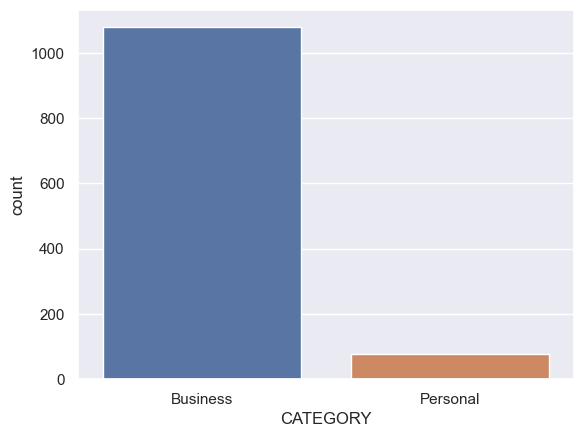

In [85]:
sns.countplot(x = data['CATEGORY'])
sns.set_theme()

#### How long (miles) do people travel in uber?

In [86]:
data['MILES']

0        5.1
1        5.0
2        4.8
3        4.7
4       63.7
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES, Length: 1155, dtype: float64

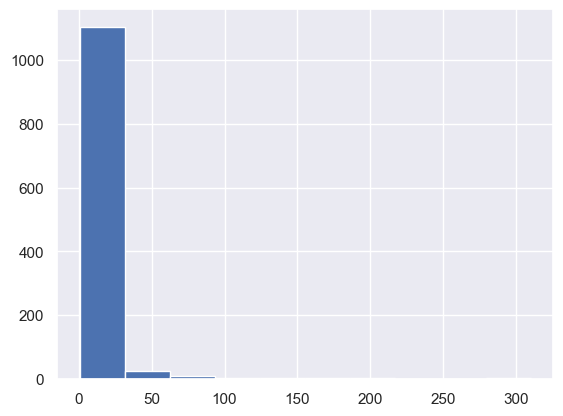

In [87]:
plt.hist(data['MILES'])
plt.show()

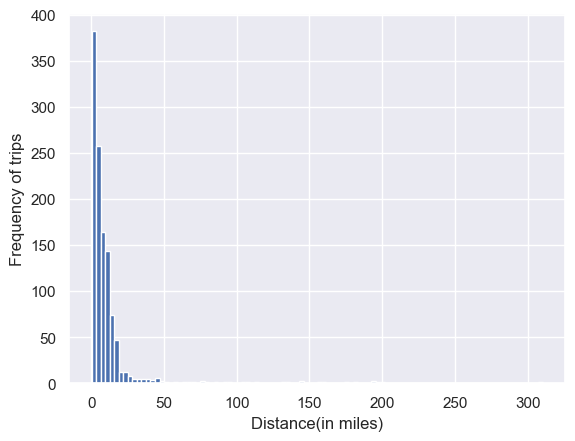

In [88]:
plt.hist(data['MILES'],bins=100)
plt.xlabel("Distance(in miles)")
plt.ylabel("Frequency of trips")
plt.show()

### Observation : 
- People often use uber for short rides

#### What hour do most people take uber?

In [89]:
data['HOUR']

0       21
1        1
2       20
3       17
4       14
        ..
1150     1
1151    13
1152    15
1153    21
1154    22
Name: HOUR, Length: 1155, dtype: int32

In [90]:
data['HOUR'].value_counts()

HOUR
15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: count, dtype: int64

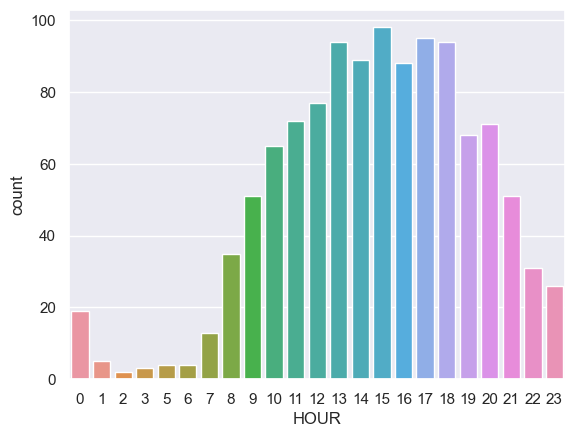

In [92]:
sns.countplot(x = data['HOUR'])
sns.set_theme()

#### Purpose of the trip

In [93]:
data['PURPOSE'].value_counts()

PURPOSE
Other              502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

<Axes: xlabel='PURPOSE', ylabel='count'>

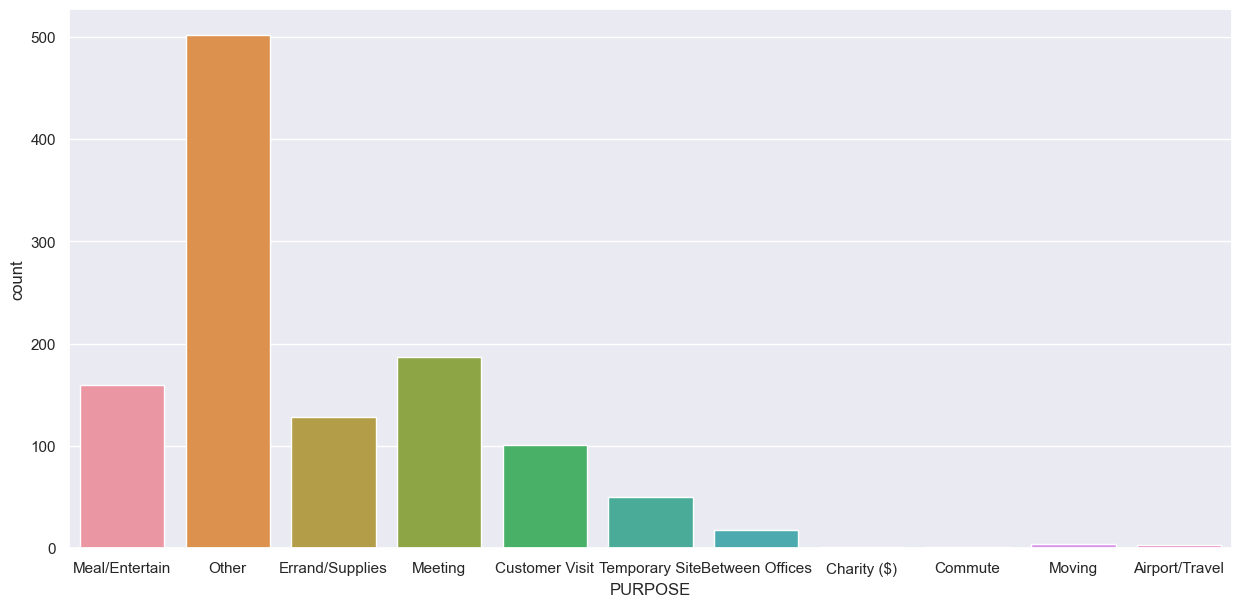

In [98]:
plt.figure(figsize=[15,7])
sns.countplot(x = data['PURPOSE'])

#### Month

<Axes: xlabel='MONTH', ylabel='count'>

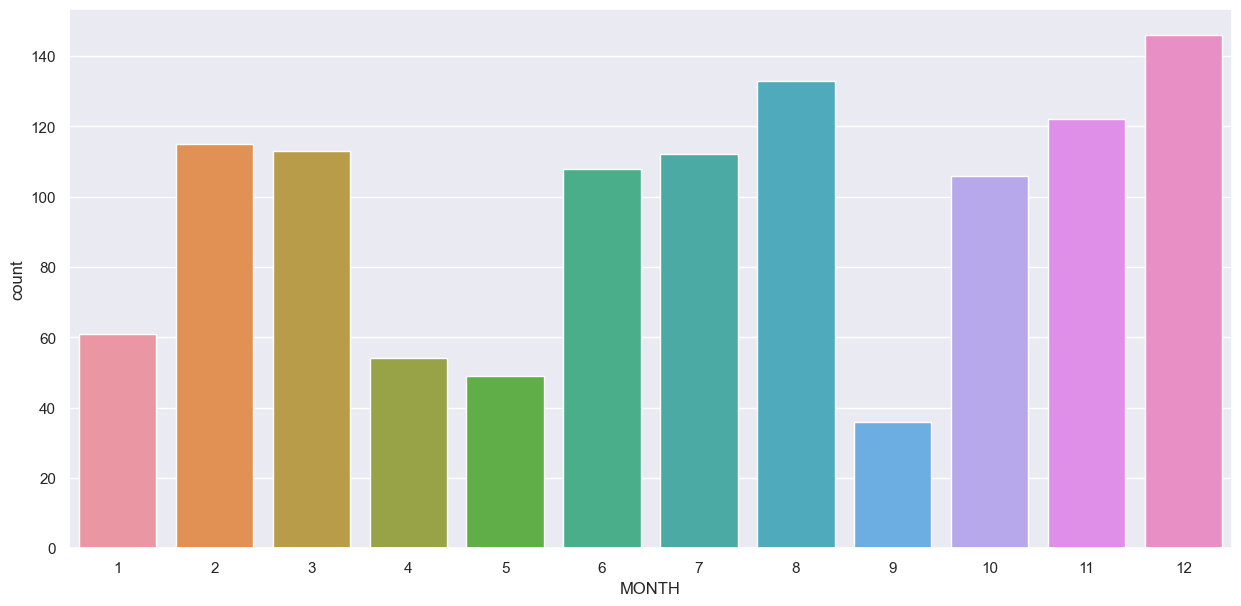

In [99]:
plt.figure(figsize=[15,7])
sns.countplot(x = data['MONTH'])

In [100]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday


In [106]:
def convertMinutes(time):
    return time.seconds/60

In [107]:
data['END_DATE']

0      2016-01-01 21:17:00
1      2016-01-02 01:37:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
               ...        
1150   2016-12-31 01:14:00
1151   2016-12-31 13:42:00
1152   2016-12-31 15:38:00
1153   2016-12-31 21:50:00
1154   2016-12-31 23:51:00
Name: END_DATE, Length: 1155, dtype: datetime64[ns]

In [108]:
data['END_DATE'] - data['START_DATE']

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Length: 1155, dtype: timedelta64[ns]

In [110]:
data['DURATION_MIN'] = (data['END_DATE'] - data['START_DATE']).apply(convertMinutes)

In [111]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MIN
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday,67.0


In [113]:
data['DURATION_MIN'].nunique()

99

In [114]:
data['DURATION_MIN'].value_counts()

DURATION_MIN
6.0      51
15.0     50
10.0     50
11.0     48
7.0      46
         ..
206.0     1
71.0      1
72.0      1
143.0     1
70.0      1
Name: count, Length: 99, dtype: int64

<Figure size 1500x800 with 0 Axes>

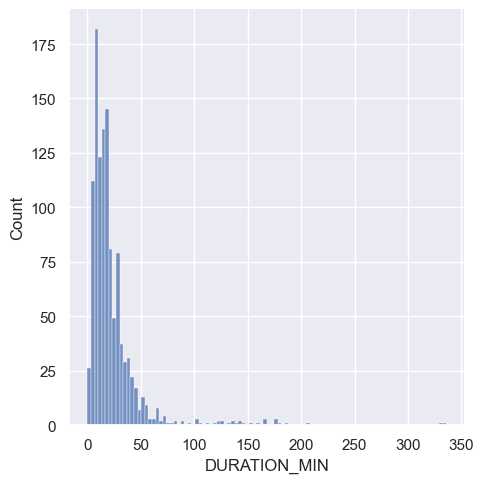

In [119]:
plt.figure(figsize=[15,8])
sns.displot(data['DURATION_MIN'],bins = 100)

#### Speed

In [120]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MIN
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday,67.0


In [121]:
data['SPEED_KMPH'] = (data['MILES']*1.609) / (data['DURATION_MIN']/60)

In [122]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MIN,SPEED_KMPH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday,6.0,82.059000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday,12.0,40.225000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday,13.0,35.645538
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0,32.409857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday,67.0,91.785045


In [123]:
data['SPEED_KMPH'].mean()

inf

In [125]:
data['SPEED_KMPH'].value_counts()

SPEED_KMPH
28.962000     18
16.090000      9
38.616000      9
19.308000      9
30.341143      9
              ..
52.658182      1
38.177182      1
32.716333      1
100.995692     1
45.176971      1
Name: count, Length: 731, dtype: int64

In [130]:
data[data['SPEED_KMPH'] > 10000]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MIN,SPEED_KMPH
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Other,17,6,9,1,Tuesday,0.0,inf
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Other,7,16,9,4,Friday,0.0,inf
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Other,15,8,10,5,Saturday,0.0,inf
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,Other,13,13,10,3,Thursday,0.0,inf


In [131]:
data[data['SPEED_KMPH'] < 10000]['SPEED_KMPH'].mean()

43.13358639335718

In [132]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MIN,SPEED_KMPH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday,6.0,82.059000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,2,1,5,Saturday,12.0,40.225000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday,13.0,35.645538
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0,32.409857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday,67.0,91.785045


In [134]:
data.to_csv('cleaned_uber_data.csv',index =False)